In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [ ]:
!pip install kaggle

# creating a dictionary to store
kaggle_set=json.load(open("kaggle.json"))

# Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME']=kaggle_set["username"]
os.environ['KAGGLE_KEY']=kaggle_set["key"]


!kaggle datasets download -d openfoodfacts/world-food-facts

Dataset URL: https://www.kaggle.com/datasets/openfoodfacts/world-food-facts
License(s): DbCL-1.0
world-food-facts.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
with ZipFile("/content/world-food-facts.zip",'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
df=pd.read_csv("/content/en.openfoodfacts.org.products.tsv", sep='\t',low_memory=False)

In [ ]:
df.head(20)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000016100,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0000000016117,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055730,2017-03-09T10:35:30Z,1489055730,2017-03-09T10:35:30Z,Organic Long Grain White Rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0000000016124,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN
8,0000000016193,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Organic Dark Chocolate Minis,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000000016513,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055654,2017-03-09T10:34:14Z,1489055654,2017-03-09T10:34:14Z,Organic Sunflower Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,283867.000000,283867.000000,0.0,283867.000000,0.0,0.0,295367.000000,869.000000,2.794970e+05,...,3228.000000,404.000000,182.000000,1383.000000,0.0,278.000000,254856.000000,254856.000000,0.0,0.0
mean,NaN,1.876851,0.023430,NaN,0.059736,NaN,NaN,1125.453320,587.216617,5.606587e+04,...,33.392680,60.360124,15.362637,52.102675,NaN,335.790664,9.166137,8.980656,NaN,NaN
std,NaN,2.501022,0.153094,NaN,0.280660,NaN,NaN,936.825952,713.255708,2.963385e+07,...,32.906834,29.262350,3.692658,19.028361,NaN,423.244817,8.999870,9.151757,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,382.000000,49.400000,1.000000e-01,...,0.000000,45.000000,12.000000,33.000000,NaN,82.650000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1092.000000,300.000000,5.290000e+00,...,25.000000,58.000000,15.000000,52.000000,NaN,190.950000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1674.000000,900.000000,2.000000e+01,...,55.000000,93.000000,15.000000,70.000000,NaN,378.700000,16.000000,16.000000,NaN,NaN
max,NaN,30.000000,2.000000,NaN,6.000000,NaN,NaN,231199.000000,3830.000000,1.566667e+10,...,100.000000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


In [ ]:
df.isnull().sum()

,0
code,26
url,26
creator,3
created_t,3
created_datetime,10
...,...
carbon-footprint_100g,355749
nutrition-score-fr_100g,101171
nutrition-score-uk_100g,101171
glycemic-index_100g,356027


In [ ]:
df.size

58032401

In [ ]:
df.shape

(356027, 163)

In [ ]:
for col in df.columns:
    print(col)


code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
no_nutriments
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states
states_tags
states_en
main_category
main_category_en
image_url
image_small_url
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
-buty

In [ ]:
columns_to_keep = [
     "product_name",
    "main_category",
    "categories",
    "ingredients_text",
    "packaging",
    "packaging_tags",
    "origins",
    "countries",
    "carbon-footprint_100g"
]


In [ ]:
'''keep_columns = [
    "product_name",
    "main_category",
    "categories",
    "ingredients_text",
    "packaging",
    "packaging_tags",
    "origins",
    "countries",
    "carbon-footprint_100g"
]
'''

'keep_columns = [\n    "product_name", \n    "main_category", \n    "categories", \n    "ingredients_text", \n    "packaging", \n    "packaging_tags",\n    "origins", \n    "countries", \n    "carbon-footprint_100g"\n]\n'

In [ ]:
available_columns = [col for col in columns_to_keep if col in df.columns]
df = df[available_columns]

# Drop empty products
df = df.dropna(subset=["product_name"])

In [ ]:
df.head(20)

,product_name,main_category,categories,ingredients_text,packaging,packaging_tags,origins,countries,carbon-footprint_100g
0,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,NaN
1,Banana Chips Sweetened (Whole),NaN,NaN,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,US,NaN
2,Peanuts,NaN,NaN,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,NaN,US,NaN
3,Organic Salted Nut Mix,NaN,NaN,"Organic hazelnuts, organic cashews, organic wa...",NaN,NaN,NaN,US,NaN
4,Organic Polenta,NaN,NaN,Organic polenta,NaN,NaN,NaN,US,NaN
5,Breadshop Honey Gone Nuts Granola,NaN,NaN,"Rolled oats, grape concentrate, expeller press...",NaN,NaN,NaN,US,NaN
6,Organic Long Grain White Rice,NaN,NaN,Organic long grain white rice,NaN,NaN,NaN,US,NaN
7,Organic Muesli,NaN,NaN,"Org oats, org hemp granola (org oats, evaporat...",NaN,NaN,NaN,US,NaN
8,Organic Dark Chocolate Minis,NaN,NaN,"Organic chocolate liquor, organic raw cane sug...",NaN,NaN,NaN,US,NaN
9,Organic Sunflower Oil,NaN,NaN,"Organic expeller pressed, refined high oleic s...",NaN,NaN,NaN,US,NaN


In [ ]:
df.isnull().sum()

,0
product_name,0
main_category,236404
categories,236354
ingredients_text,56418
packaging,248992
packaging_tags,248992
origins,313558
countries,219
carbon-footprint_100g,338238


In [ ]:
df.shape

(338515, 9)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,product_name,main_category,categories,ingredients_text,packaging,packaging_tags,origins,countries,carbon-footprint_100g
177440,Chopped Tomato Carla,en:chopeed-tomatoes,Chopeed tomatoes,"Chopped tomatoes, tomato juice, acidity corector","can,tins,tin,cans,cartoned can,canned","can,tins,tin,cans,cartoned-can,canned",Italy,Italy,0.000000
178093,confiture abricots,en:plant-based-foods-and-beverages,"Aliments et boissons à base de végétaux,Alimen...","abricots,sucre,sirop de glucose,purée de fruits",verre,verre,"loire atlantique,France",France,0.000001
186022,Yogourt Nature,en:dairies,Yaourt,"yogourt au lait entier (lait entier**, lait éc...",Plastique,plastique,Suisse,Suisse,82.800000
186043,Joghurt Léger (Nature),en:dairies,Yaourt,"yogourt maigre (lait écrémé, protéines du lait...","Plastique,Alu,stück","plastique,alu,stuck",Suisse,Suisse,56.200000
186048,Yogourt Nature,en:dairies,Yaourt,"lait entier**, lait écrémé en poudre**, protéi...",Plastique,plastique,"Suisse, Switzerland",Suisse,82.600000


In [ ]:
df.isnull().sum()

,0
product_name,0
main_category,0
categories,0
ingredients_text,0
packaging,0
packaging_tags,0
origins,0
countries,0
carbon-footprint_100g,0


In [ ]:
df.shape

(141, 9)

In [ ]:
df.head(50)

,product_name,main_category,categories,ingredients_text,packaging,packaging_tags,origins,countries,carbon-footprint_100g
177440,Chopped Tomato Carla,en:chopeed-tomatoes,Chopeed tomatoes,"Chopped tomatoes, tomato juice, acidity corector","can,tins,tin,cans,cartoned can,canned","can,tins,tin,cans,cartoned-can,canned",Italy,Italy,0.000000
178093,confiture abricots,en:plant-based-foods-and-beverages,"Aliments et boissons à base de végétaux,Alimen...","abricots,sucre,sirop de glucose,purée de fruits",verre,verre,"loire atlantique,France",France,0.000001
186022,Yogourt Nature,en:dairies,Yaourt,"yogourt au lait entier (lait entier**, lait éc...",Plastique,plastique,Suisse,Suisse,82.800000
186043,Joghurt Léger (Nature),en:dairies,Yaourt,"yogourt maigre (lait écrémé, protéines du lait...","Plastique,Alu,stück","plastique,alu,stuck",Suisse,Suisse,56.200000
186048,Yogourt Nature,en:dairies,Yaourt,"lait entier**, lait écrémé en poudre**, protéi...",Plastique,plastique,"Suisse, Switzerland",Suisse,82.600000
186357,Dos de Cabillaud MSC,en:seafood,"Cabillauds,Poissons",Dos de _Cabillaud _MSC.,"Plastique,Frais","plastique,frais",Islande,France,0.000000
206855,Sirop de Fraise,en:beverages,sirops de fraise,"sucre, jus de fruits à base de concentrés 30% ...","bouteille,Acier recyclable","bouteille,acier-recyclable",France,France,130.000000
206857,Palmiers,en:sugary-snacks,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Bis...",Farine de _blé_ 58% - margarine [huiles et gra...,"Boite,Carton","boite,carton",France,France,365.000000
206860,Pommes noisettes,en:frozen-foods,"Pommes noisettes,Surgelés","Pommes de terre 84%, huile végétale de tournes...","Surgelé,Carton","surgele,carton",Belgique,France,255.000000
206892,Viande des grisons,en:meats,"Viandes,Boeuf,viande des grisons",Viande de bœuf - sel - épices et plantes aroma...,Plastique,plastique,"Suisse,France",France,2520.000000


In [ ]:
df.drop(columns=['ingredients_text'], inplace=True)

In [ ]:
df.columns

Index(['product_name', 'main_category', 'categories', 'packaging',
       'packaging_tags', 'origins', 'countries', 'carbon-footprint_100g'],
      dtype='object')

In [ ]:
df.dtypes

,0
product_name,object
main_category,object
categories,object
packaging,object
packaging_tags,object
origins,object
countries,object
carbon-footprint_100g,float64


In [ ]:
df.drop(columns=['packaging'], inplace=True)

In [ ]:
df.describe()

,carbon-footprint_100g
count,141.000000
mean,319.135140
std,357.778749
min,0.000000
25%,120.000000
50%,189.000000
75%,395.000000
max,2520.000000


In [ ]:
df.columns

Index(['product_name', 'main_category', 'categories', 'packaging_tags',
       'origins', 'countries', 'carbon-footprint_100g'],
      dtype='object')

In [ ]:
df['countries'].unique()

array(['Italy', 'France', 'Suisse', 'France,Hong Kong',
       'Belgique,France,Suisse', 'United States,United Kingdom',
       'Tunisie', 'Switzerland', 'Brasil', 'Italie', 'Spain', 'en:spain'],
      dtype=object)

In [ ]:
df['main_category'].unique()

array(['en:chopeed-tomatoes', 'en:plant-based-foods-and-beverages',
       'en:dairies', 'en:seafood', 'en:beverages', 'en:sugary-snacks',
       'en:frozen-foods', 'en:meats', 'en:fresh-foods', 'en:desserts',
       'en:spreads', 'en:farming-products', 'en:canned-foods', 'en:meals',
       'en:chips-and-fries', 'fr:feuilles-de-brick',
       'fr:lait-demi-ecreme-sterilise-uht', 'en:sweeteners',
       'en:fruit-juices-and-nectars', 'fr:chocolat-noir-aux-amandes-bio',
       'en:lait', 'pt:barra-de-cereal', 'en:groceries'], dtype=object)

In [ ]:
country_map = {
    'Suisse': 'Switzerland',
    'Italie': 'Italy',
    'en:spain': 'Spain',
    'Belgique': 'Belgium',
    'Brasil': 'Brazil',
    'Tunisie': 'Tunisia'

}

for old, new in country_map.items():
    df['countries'] = df['countries'].str.replace(old, new)


In [ ]:
df['countries'].unique()

array(['Italy', 'France', 'Switzerland', 'France,Hong Kong',
       'Belgium,France,Switzerland', 'United States,United Kingdom',
       'Tunisia', 'Brazil', 'Spain'], dtype=object)

In [ ]:
df.rename(columns={'packaging_tags': 'packaging'}, inplace=True)


<Axes: xlabel='carbon-footprint_100g'>

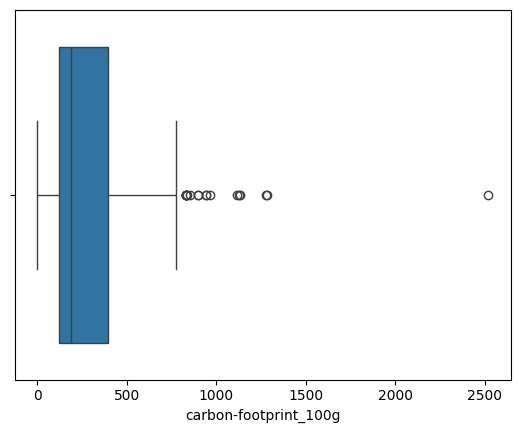

In [ ]:
import seaborn as sns
sns.boxplot(x=df['carbon-footprint_100g'])

In [ ]:
df.max()

,0
product_name,confiture abricots
main_category,pt:barra-de-cereal
categories,"Édulcorants,Sucres,Sucres de canne"
packaging,"verre,bocal,metal"
origins,"Éthiopie,coopérative sidama"
countries,"United States,United Kingdom"
carbon-footprint_100g,2520.0


In [ ]:
df.drop(columns=['categories'],inplace=True)

In [ ]:
df['origins'].unique()

array(['Italy', 'loire atlantique,France', 'Suisse',
       'Suisse, Switzerland', 'Islande', 'France', 'Belgique',
       'Suisse,France', 'Union Européenne',
       'Communauté Européenne,Monde,Hors Communauté Européenne', 'Maroc',
       'Porc,Union Européenne', 'Italie', 'Thaïlande', 'agriculture UE',
       'Saumon (Salmo salar)', 'Bayonne,France', 'Agriculture UE',
       'Espagne', 'origine UE',
       'Aqualande,40120 Sarbazan,Landes,Aquitaine,France,Truites arc-en-ciel élevées en Europe',
       'Aqualande,40120 Sarbazan,Landes,Truite arc-en-ciel (Oncorhynchus mykiss),Lau Balagnas,Gave de Pau,Soulom,Gave de Gavarnie,Hautes-Pyrénées,Midi-Pyrénées,Bruges,Rivière Le Béez,Pyrénées-Atlantiques,Aquitaine,France',
       'Lau Balagnas', 'Lau Balagnas (65),Bruges (64),Esterençuby (64)',
       'lait de vaches dans les plaines du Nord de la France (27,76,80,62,59,02,60,95,77,51,10,52,55,departements 27,76 80,62 59,02 60,95 77,08,51 10',
       'Aisne', 'aisne', 'Pérou,non UE', 'Pérou,C

In [ ]:
import pandas as pd

# Your DataFrame is assumed to be called df
# Make sure 'origins' column is present

origin_mapping = {
    # Europe
    'France': 'France',
    'loire atlantique,France': 'France',
    'Bayonne,France': 'France',
    'France,coopérative CORAB Poitou-Charente,agriculture UE / non UE': 'France',
    'France,Coopérative Corab,Poitou-Charentes': 'France',
    'Poitou-Charentes': 'France',
    'Paraguay,France': 'France',

    'Suisse': 'Switzerland',
    'Suisse, Switzerland': 'Switzerland',
    'Schweiz': 'Switzerland',
    'Suisse,Terrasuisse': 'Switzerland',
    'Inde,Schweiz': 'Switzerland',

    'Italia': 'Italy',
    'italy': 'Italy',
    'Italy': 'Italy',

    'Espagne': 'Spain',
    'España': 'Spain',

    'Belgique': 'Belgium',

    'England': 'United Kingdom',

    'Islande': 'Iceland',

    'Union Européenne': 'European Union',
    'Communauté Européenne,Monde,Hors Communauté Européenne': 'European Union',
    'origine UE': 'European Union',
    'agriculture UE': 'European Union',
    'Agriculture UE': 'European Union',

    # Americas
    'Pérou': 'Peru',
    'Pérou,non UE': 'Peru',
    'Pérou,Coopérative Acopagro': 'Peru',
    'Pérou,Coopérative Acopagro,Non UE': 'Peru',
    'Pérou,Paraguay,Madagascar,République dominicaine': 'Peru',
    'agriculture non UE,Pérou': 'Peru',

    'Paraguay,République dominicaine,Coopérative Conacado': 'Paraguay',
    'Paraguay,coopérative Manduvira': 'Paraguay',
    'Coopérative Manduvira,Paraguay': 'Paraguay',

    'Mexique': 'Mexico',
    'Mexique,Coopérative Mas Café': 'Mexico',

    'Guatémala': 'Guatemala',

    'Costa Rica,coopérative A.P.P.T.A.': 'Costa Rica',

    'Brésil,Coopérative Coagrosol': 'Brazil',
    'Paraná,Brasil': 'Brazil',
    'BRASILIA': 'Brazil',

    'Colombie,Perou,Coopérative Naranjillo': 'Colombia',

    'Équateur': 'Ecuador',
    'Equateur': 'Ecuador',
    'Equateur,Coopératives Fortaleza Unocace': 'Ecuador',

    # Africa
    'Maroc': 'Morocco',
    'Afrique du Sud,Plateau de Bokkeveld': 'South Africa',
    'agriculture non UE,Afrique du Sud - plateau du Bokkeveld': 'South Africa',
    'Éthiopie,coopérative sidama': 'Ethiopia',

    'République Dominicaine': 'Dominican Republic',
    'Paraguay,République Dominicaine,Madagascar': 'Paraguay',
    'agriculture non UE,Paraguay,République Dominicaine,Pérou': 'Paraguay',

    # Asia
    'Thaïlande': 'Thailand',
    'coopérative O.R.F.S.C,Thailande': 'Thailand',
    'Yunnan,Chine': 'China',
    'Chine': 'China',

    'Philippines': 'Philippines',
    'Sri Lanka': 'Sri Lanka',
    'Sri Lanka,région de Gampola': 'Sri Lanka',
    "Région d'Haputale,Sri Lanka": 'Sri Lanka',
    "Région de Gampola,Sri Lanka": 'Sri Lanka',
    'Sri Lanka,Gampola': 'Sri Lanka',
    'Sri Lanka,Coopérative SOFA': 'Sri Lanka',

    # Others
    'Saumon (Salmo salar)': 'Other',
    'Porc,Union Européenne': 'Other',
    'Aqualande,40120 Sarbazan,Landes,Aquitaine,France,Truites arc-en-ciel élevées en Europe': 'France',
    'Aqualande,40120 Sarbazan,Landes,Truite arc-en-ciel (Oncorhynchus mykiss),Lau Balagnas,Gave de Pau,Soulom,Gave de Gavarnie,Hautes-Pyrénées,Midi-Pyrénées,Bruges,Rivière Le Béez,Pyrénées-Atlantiques,Aquitaine,France': 'France',
    'Lau Balagnas': 'France',
    'Lau Balagnas (65),Bruges (64),Esterençuby (64)': 'France',
    'lait de vaches dans les plaines du Nord de la France (27,76,80,62,59,02,60,95,77,51,10,52,55,departements 27,76 80,62 59,02 60,95 77,08,51 10': 'France',
    'Aisne': 'France',
    'aisne': 'France',

    '?': 'Other'
}

# Now replace using the mapping
df['origins'] = df['origins'].replace(origin_mapping)

# If there are still multi-values not covered, split by "," and take first
df['origins'] = df['origins'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

valid_origins = set(origin_mapping.values()) | {'France', 'Italy', 'Switzerland', 'Spain', 'Belgium', 'United Kingdom', 'Iceland', 'Brazil', 'Peru', 'Paraguay', 'Mexico', 'Guatemala', 'Costa Rica', 'Ecuador', 'Morocco', 'South Africa', 'Ethiopia', 'Dominican Republic', 'Thailand', 'China', 'Philippines', 'Sri Lanka', 'European Union', 'Other'}
df['origins'] = df['origins'].apply(lambda x: x if x in valid_origins else 'Other')



In [ ]:
df['origins'].unique()

array(['Italy', 'France', 'Switzerland', 'Iceland', 'Belgium', 'Other',
       'European Union', 'Morocco', 'Thailand', 'Spain', 'Peru',
       'Paraguay', 'Sri Lanka', 'Mexico', 'Guatemala', 'South Africa',
       'China', 'Colombia', 'Philippines', 'Ethiopia', 'Brazil',
       'Costa Rica', 'Ecuador', 'Dominican Republic', 'United Kingdom'],
      dtype=object)

In [ ]:
df.columns

Index(['product_name', 'main_category', 'packaging', 'origins', 'countries',
       'carbon-footprint_100g'],
      dtype='object')

In [ ]:
df.head()

,product_name,main_category,packaging,origins,countries,carbon-footprint_100g
177440,Chopped Tomato Carla,en:chopeed-tomatoes,"can,tins,tin,cans,cartoned-can,canned",Italy,Italy,0.000000
178093,confiture abricots,en:plant-based-foods-and-beverages,verre,France,France,0.000001
186022,Yogourt Nature,en:dairies,plastique,Switzerland,Switzerland,82.800000
186043,Joghurt Léger (Nature),en:dairies,"plastique,alu,stuck",Switzerland,Switzerland,56.200000
186048,Yogourt Nature,en:dairies,plastique,Switzerland,Switzerland,82.600000


In [ ]:
df['packaging'].unique()

array(['can,tins,tin,cans,cartoned-can,canned', 'verre', 'plastique',
       'plastique,alu,stuck', 'plastique,frais',
       'bouteille,acier-recyclable', 'boite,carton', 'surgele,carton',
       'plastique,carton',
       'frais,barquette,plastique,opercule,film-plastique,ouverture-facile,barquettes-detachables,sous-atmosphere-protectrice,frais',
       'frais,barquette,plastique,opercule,film-plastique,ouverture-facile,barquettes-detachables,sous-atmosphere-protectrice',
       'brique,carton,bouchon', 'suremballage-carton,metal',
       'aluminium,carton', 'carton', 'plastique,squeezer,flacon',
       'boite-metal', 'boite-metal,conserve',
       'frais,pot-micro-ondable,plastique,opercule,sous-atmosphere-protectrice',
       'bouteille,verre',
       'frais,sachet-plastique,sous-atmosphere-protectrice',
       'carton,plastique,sachet,boite', 'poche-plastifiee',
       'frais,plastique,sous-atmosphere-protectrice', 'conserve',
       'carton,sachet-plastique,atmosphere-protectrice

In [ ]:
packaging_category_map = {
    # METAL
    'can,tins,tin,cans,cartoned-can,canned': 'Metal',
    'boite-metal': 'Metal', 'boite-metal,conserve': 'Metal',
    'conserve': 'Metal', 'conserve,canned': 'Metal',
    'can,canned,tins': 'Metal',

    # GLASS
    'verre': 'Glass', 'pot,verre': 'Glass',
    'bouteille,verre': 'Glass',
    'botella-dorica-vidrio-oscura,botella-de-vidrio': 'Glass',
    'botella-bertoli-cristal-transparente,botella-de-vidrio': 'Glass',
    'frasca,botella-de-vidrio': 'Glass',
    'frasca-con-vertedor,botella-de-vidrio': 'Glass',
    'frasca-oscura,botella-de-vidrio': 'Glass',

    # PLASTIC
    'plastique': 'Plastic', 'plastique,frais': 'Plastic',
    'plastique,squeezer,flacon': 'Plastic', 'plastique,barquette': 'Plastic',
    'plastique,surgele': 'Plastic', 'bouteille,plastique': 'Plastic',
    'sachet-plastique': 'Plastic', 'film,plastique': 'Plastic',
    'plastic-bag': 'Plastic', 'sachet-cellophane': 'Plastic', 'pp-05': 'Plastic',
    'botella-pet': 'Plastic', 'botella-marasca-pet': 'Plastic',

    # TETRA PACK
    'tetra-pack,brique,carton': 'Tetra Pack', 'tetra-pack': 'Tetra Pack',
    'tetra-pak': 'Tetra Pack', 'tetrapak': 'Tetra Pack',
    'tetrapak,tetrapak': 'Tetra Pack', 'tetra-pack,packung': 'Tetra Pack',

    # CARDBOARD / PAPER
    'boite,carton': 'Cardboard', 'surgele,carton': 'Cardboard',
    'brique,carton,bouchon': 'Cardboard', 'carton': 'Cardboard',
    'boite-de-6,carton': 'Cardboard', 'paquet,carton': 'Cardboard',
    'papier': 'Cardboard', 'sachet-papier': 'Cardboard',

    # MIXED
    'plastique,alu,stuck': 'Mixed', 'plastique,carton': 'Mixed',
    'frais,barquette,plastique,opercule,film-plastique,ouverture-facile,barquettes-detachables,sous-atmosphere-protectrice,frais': 'Mixed',
    'frais,barquette,plastique,opercule,film-plastique,ouverture-facile,barquettes-detachables,sous-atmosphere-protectrice': 'Mixed',
    'suremballage-carton,metal': 'Mixed', 'aluminium,carton': 'Mixed',
    'frais,pot-micro-ondable,plastique,opercule,sous-atmosphere-protectrice': 'Mixed',
    'frais,sachet-plastique,sous-atmosphere-protectrice': 'Mixed',
    'carton,plastique,sachet,boite': 'Mixed', 'poche-plastifiee': 'Mixed',
    'frais,plastique,sous-atmosphere-protectrice': 'Mixed',
    'carton,sachet-plastique,atmosphere-protectrice': 'Mixed',
    'carton,sachet-plastique': 'Mixed',
    'surgele,barquette,carton,barquette-micro-ondable,ouverture-facile': 'Mixed',
    'barquette,plastique,frais,carton': 'Mixed',
    'frais,sachet-plastique,sachet-zip-refermable': 'Mixed',
    'frais,chapelet-de-3-sachets,sachet-plastique-a-jeter,ouverture-facile,sous-atmosphere-protectrice': 'Mixed',
    'barquette-carton-sous-vide': 'Mixed', 'frais,plastique,carton,sous-vide': 'Mixed',
    'plastique,carton,plastique,triman,en-green-dot,pensez-au-tri,barquette-et-film-plastique-a-jeter': 'Mixed',
    'carton,plastique': 'Mixed', 'verre,bocal,metal': 'Mixed',
    'brique,carton,plastique': 'Mixed', 'etui,carton,feuille,aluminium': 'Mixed',
    'carton,plastique,sachets': 'Mixed', 'sous-atmosphere-protectrice': 'Mixed',
    'sous-vide': 'Mixed', 'boite,sachets-individuels': 'Mixed',
    'boite,carton,sachets,plastique': 'Mixed',
    'bocal,verre,couvercle,plastique': 'Mixed',
    'atmosphere-protectrice,valve-fraicheur': 'Mixed',
    'carton,sachets-fraicheurs': 'Mixed', 'carton,film-plastique': 'Mixed',
    'boite,carton,sachet': 'Mixed', 'boite,carton,sachets,papier': 'Mixed',
    'carton,papier-aluminium': 'Mixed', 'carton,sachet': 'Mixed',
    'carton,sachet,plastique': 'Mixed', 'tablette': 'Mixed',
    'carton,feuille-aluminium': 'Mixed', 'paper-and-plastic,paquet': 'Mixed',
    'carton-plastique': 'Mixed', 'plastique,alu': 'Mixed',

    # OTHER
    'frais': 'Other', 'barra': 'Other', 'monodosis': 'Other'
}

df['packaging'] = df['packaging'].map(packaging_category_map).fillna('Other')


In [ ]:
df['packaging'].unique()

array(['Metal', 'Glass', 'Plastic', 'Mixed', 'Other', 'Cardboard',
       'Tetra Pack'], dtype=object)

In [ ]:
df.head(20)

,product_name,main_category,packaging,origins,countries,carbon-footprint_100g
177440,Chopped Tomato Carla,en:chopeed-tomatoes,Metal,Italy,Italy,0.000000
178093,confiture abricots,en:plant-based-foods-and-beverages,Glass,France,France,0.000001
186022,Yogourt Nature,en:dairies,Plastic,Switzerland,Switzerland,82.800000
186043,Joghurt Léger (Nature),en:dairies,Mixed,Switzerland,Switzerland,56.200000
186048,Yogourt Nature,en:dairies,Plastic,Switzerland,Switzerland,82.600000
186357,Dos de Cabillaud MSC,en:seafood,Plastic,Iceland,France,0.000000
206855,Sirop de Fraise,en:beverages,Other,France,France,130.000000
206857,Palmiers,en:sugary-snacks,Cardboard,France,France,365.000000
206860,Pommes noisettes,en:frozen-foods,Cardboard,Belgium,France,255.000000
206892,Viande des grisons,en:meats,Plastic,Other,France,2520.000000


In [ ]:
df.rename(columns={'main_category': 'category'}, inplace=True)

In [ ]:
df.head()

,product_name,category,packaging,origins,countries,carbon-footprint_100g
177440,Chopped Tomato Carla,en:chopeed-tomatoes,Metal,Italy,Italy,0.000000
178093,confiture abricots,en:plant-based-foods-and-beverages,Glass,France,France,0.000001
186022,Yogourt Nature,en:dairies,Plastic,Switzerland,Switzerland,82.800000
186043,Joghurt Léger (Nature),en:dairies,Mixed,Switzerland,Switzerland,56.200000
186048,Yogourt Nature,en:dairies,Plastic,Switzerland,Switzerland,82.600000


In [ ]:
df['category'].unique()

array(['en:chopeed-tomatoes', 'en:plant-based-foods-and-beverages',
       'en:dairies', 'en:seafood', 'en:beverages', 'en:sugary-snacks',
       'en:frozen-foods', 'en:meats', 'en:fresh-foods', 'en:desserts',
       'en:spreads', 'en:farming-products', 'en:canned-foods', 'en:meals',
       'en:chips-and-fries', 'fr:feuilles-de-brick',
       'fr:lait-demi-ecreme-sterilise-uht', 'en:sweeteners',
       'en:fruit-juices-and-nectars', 'fr:chocolat-noir-aux-amandes-bio',
       'en:lait', 'pt:barra-de-cereal', 'en:groceries'], dtype=object)

In [ ]:
category_map = {
    # DAIRY
    'en:dairies': 'Dairy',
    'fr:semi-skimmed-sterilized-uht milk': 'Dairy',
    'in:milk': 'Dairy',

    # MEAT & SEAFOOD
    'en:seafood': 'Seafood',
    'en:meats': 'Meat',

    # PLANT-BASED
    'en:plant-based-foods-and-beverages': 'Plant-based',
    'en:farming-products': 'Plant-based',

    # BEVERAGES
    'en:beverages': 'Beverages',
    'en:fruit-juices-and-nectars': 'Beverages',

    # SNACKS
    'en:sugary-snacks': 'Snacks',
    'en:chips-and-fries': 'Snacks',
    'pt:cereal-bar': 'Snacks',
    'fr:organic-dark-chocolate-with-almonds': 'Snacks',

    # FROZEN
    'en:frozen-foods': 'Frozen Food',

    # FRESH
    'en:fresh-foods': 'Fresh Food',

    # SWEET / OTHER
    'en:desserts': 'Desserts',
    'en:sweeteners': 'Sweeteners',

    # SPREADS & CONDIMENTS
    'en:spreads': 'Spreads',

    # PREPARED / CANNED
    'en:canned-foods': 'Prepared Foods',
    'en:chopeed-tomatoes': 'Prepared Foods',
    'en:meals': 'Prepared Foods',
    'fr:feuilles-de-brick': 'Prepared Foods',

    # PANTRY & GENERAL
    'in:groceries': 'Groceries',
}
df['category'] = df['category'].map(category_map).fillna('Other')


In [ ]:
df['category'].unique()

array(['Prepared Foods', 'Plant-based', 'Dairy', 'Seafood', 'Beverages',
       'Snacks', 'Frozen Food', 'Meat', 'Fresh Food', 'Desserts',
       'Spreads', 'Other', 'Sweeteners'], dtype=object)

In [ ]:
df.head(10)

,product_name,category,packaging,origins,countries,carbon-footprint_100g
177440,Chopped Tomato Carla,Prepared Foods,Metal,Italy,Italy,0.000000
178093,confiture abricots,Plant-based,Glass,France,France,0.000001
186022,Yogourt Nature,Dairy,Plastic,Switzerland,Switzerland,82.800000
186043,Joghurt Léger (Nature),Dairy,Mixed,Switzerland,Switzerland,56.200000
186048,Yogourt Nature,Dairy,Plastic,Switzerland,Switzerland,82.600000
186357,Dos de Cabillaud MSC,Seafood,Plastic,Iceland,France,0.000000
206855,Sirop de Fraise,Beverages,Other,France,France,130.000000
206857,Palmiers,Snacks,Cardboard,France,France,365.000000
206860,Pommes noisettes,Frozen Food,Cardboard,Belgium,France,255.000000
206892,Viande des grisons,Meat,Plastic,Other,France,2520.000000


In [ ]:
df['origins'].unique()

array(['Italy', 'France', 'Switzerland', 'Iceland', 'Belgium', 'Other',
       'European Union', 'Morocco', 'Thailand', 'Spain', 'Peru',
       'Paraguay', 'Sri Lanka', 'Mexico', 'Guatemala', 'South Africa',
       'China', 'Colombia', 'Philippines', 'Ethiopia', 'Brazil',
       'Costa Rica', 'Ecuador', 'Dominican Republic', 'United Kingdom'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# create a label encoder for each column
le_category = LabelEncoder()
le_packaging = LabelEncoder()
le_origins = LabelEncoder()
le_countries = LabelEncoder()

# fit and transform
df['category_encoded'] = le_category.fit_transform(df['category'])
df['packaging_encoded'] = le_packaging.fit_transform(df['packaging'])
df['origins_encoded'] = le_origins.fit_transform(df['origins'])
df['countries_encoded'] = le_countries.fit_transform(df['countries'])


In [ ]:
df.head(20)

,product_name,category,packaging,origins,countries,carbon-footprint_100g,category_encoded,packaging_encoded,origins_encoded,countries_encoded
177440,Chopped Tomato Carla,Prepared Foods,Metal,Italy,Italy,0.000000,8,2,12,4
178093,confiture abricots,Plant-based,Glass,France,France,0.000001,7,1,9,2
186022,Yogourt Nature,Dairy,Plastic,Switzerland,Switzerland,82.800000,1,5,22,6
186043,Joghurt Léger (Nature),Dairy,Mixed,Switzerland,Switzerland,56.200000,1,3,22,6
186048,Yogourt Nature,Dairy,Plastic,Switzerland,Switzerland,82.600000,1,5,22,6
186357,Dos de Cabillaud MSC,Seafood,Plastic,Iceland,France,0.000000,9,5,11,2
206855,Sirop de Fraise,Beverages,Other,France,France,130.000000,0,4,9,2
206857,Palmiers,Snacks,Cardboard,France,France,365.000000,10,0,9,2
206860,Pommes noisettes,Frozen Food,Cardboard,Belgium,France,255.000000,4,0,0,2
206892,Viande des grisons,Meat,Plastic,Other,France,2520.000000,5,5,15,2


In [ ]:
category_mapping = dict(zip(le_category.classes_, le_category.transform(le_category.classes_)))
packaging_mapping = dict(zip(le_packaging.classes_, le_packaging.transform(le_packaging.classes_)))
origins_mapping = dict(zip(le_origins.classes_, le_origins.transform(le_origins.classes_)))
countries_mapping = dict(zip(le_countries.classes_, le_countries.transform(le_countries.classes_)))

print("Category Mapping:", category_mapping)
print("Packaging Mapping:", packaging_mapping)
print("Origins Mapping:", origins_mapping)
print("Countries Mapping:", countries_mapping)


Category Mapping: {'Beverages': np.int64(0), 'Dairy': np.int64(1), 'Desserts': np.int64(2), 'Fresh Food': np.int64(3), 'Frozen Food': np.int64(4), 'Meat': np.int64(5), 'Other': np.int64(6), 'Plant-based': np.int64(7), 'Prepared Foods': np.int64(8), 'Seafood': np.int64(9), 'Snacks': np.int64(10), 'Spreads': np.int64(11), 'Sweeteners': np.int64(12)}
Packaging Mapping: {'Cardboard': np.int64(0), 'Glass': np.int64(1), 'Metal': np.int64(2), 'Mixed': np.int64(3), 'Other': np.int64(4), 'Plastic': np.int64(5), 'Tetra Pack': np.int64(6)}
Origins Mapping: {'Belgium': np.int64(0), 'Brazil': np.int64(1), 'China': np.int64(2), 'Colombia': np.int64(3), 'Costa Rica': np.int64(4), 'Dominican Republic': np.int64(5), 'Ecuador': np.int64(6), 'Ethiopia': np.int64(7), 'European Union': np.int64(8), 'France': np.int64(9), 'Guatemala': np.int64(10), 'Iceland': np.int64(11), 'Italy': np.int64(12), 'Mexico': np.int64(13), 'Morocco': np.int64(14), 'Other': np.int64(15), 'Paraguay': np.int64(16), 'Peru': np.int6

In [ ]:
df.drop(columns=['category', 'packaging', 'origins', 'countries','product_name'], inplace=True)

In [ ]:
df.to_csv('df_cleaned.csv', index=False)

<Axes: xlabel='carbon-footprint_100g'>

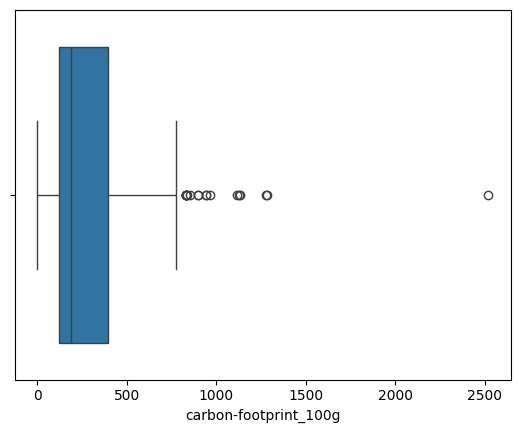

In [ ]:
sns.boxplot(x=df['carbon-footprint_100g'])

<Axes: xlabel='carbon-footprint_100g', ylabel='Count'>

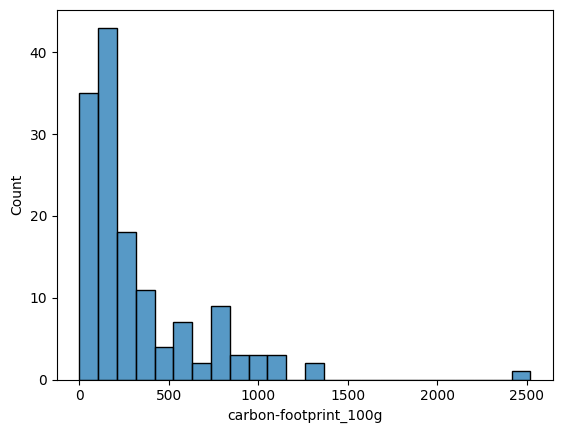

In [ ]:
sns.histplot(df['carbon-footprint_100g'])

In [ ]:
q95 = df['carbon-footprint_100g'].quantile(0.95)
df = df[df['carbon-footprint_100g'] < q95]

<Axes: xlabel='carbon-footprint_100g', ylabel='Count'>

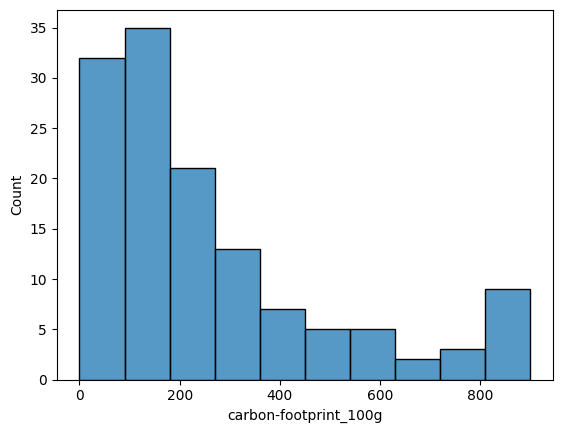

In [ ]:
sns.histplot(df['carbon-footprint_100g'])

<Axes: xlabel='carbon-footprint_100g'>

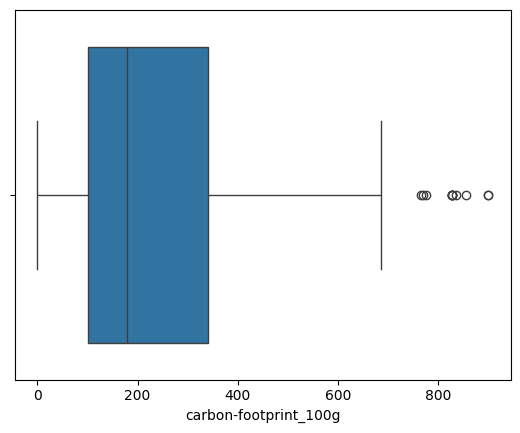

In [ ]:
sns.boxplot(x=df['carbon-footprint_100g'])

In [ ]:
df['carbon-footprint_100g'].mean()

np.float64(255.24242425)

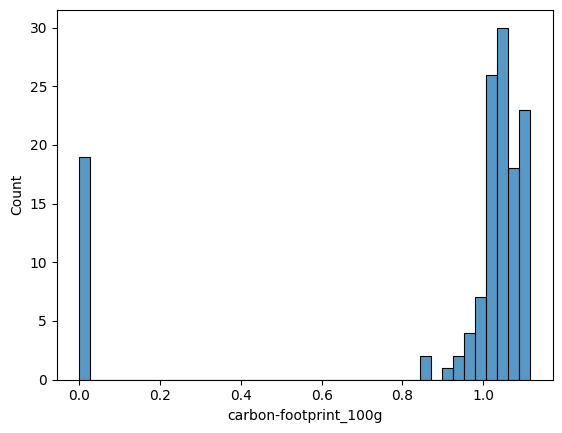

In [ ]:
import numpy as np
df['carbon-footprint_100g'] = np.log1p(df['carbon-footprint_100g'])
sns.histplot(df['carbon-footprint_100g'])
df.drop(columns=['origins_encoded'], inplace=True)

In [ ]:
# Separating data and label
x=df.drop(columns='carbon-footprint_100g',axis=1)
y=df['carbon-footprint_100g']
print(x)
print(y)

        category_encoded  packaging_encoded  countries_encoded
177440                 8                  2                  4
178093                 7                  1                  2
186022                 1                  5                  6
186043                 1                  3                  6
186048                 1                  5                  6
...                  ...                ...                ...
341032                 7                  1                  5
341033                 7                  1                  5
341034                 7                  1                  5
341039                 7                  4                  5
341040                 7                  1                  5

[132 rows x 3 columns]
177440    0.000000e+00
178093    9.999985e-07
186022    9.901546e-01
186043    9.626802e-01
186048    9.899910e-01
              ...     
341032    0.000000e+00
341033    0.000000e+00
341034    0.000000e+00
341039    0.0

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)
print(x.shape,xtrain.shape,xtest.shape)

(132, 3) (99, 3) (33, 3)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model=LinearRegression()
model.fit(xtrain,ytrain)
# Evaluate the model on the training data
ytrain_prediction=model.predict(xtrain)
mse_train = mean_squared_error(ytrain, ytrain_prediction)
r2_train = r2_score(ytrain, ytrain_prediction)
print("linear Regression")
print('Mean Squared Error on training data:', mse_train)
print('R-squared on training data:', r2_train)

# Evaluate the model on the test data
ytest_prediction=model.predict(xtest)
mse_test = mean_squared_error(ytest, ytest_prediction)
r2_test = r2_score(ytest, ytest_prediction)
print('Mean Squared Error on test data:', mse_test)
print('R-squared on test data:', r2_test)

linear Regression
Mean Squared Error on training data: 0.1154213175051471
R-squared on training data: 0.08599861954556531
Mean Squared Error on test data: 0.140604386744302
R-squared on test data: 0.15512584629960868


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
model2=SVR()
model2.fit(xtrain,ytrain)
xtrain_prediction=model2.predict(xtrain)
mse_train = mean_squared_error(ytrain, xtrain_prediction)
r2_train = r2_score(ytrain, xtrain_prediction)
print("SVM")
print('Mean Squared Error on training data:', mse_train)
print('R-squared on training data:', r2_train)

xtest_prediction=model2.predict(xtest)
mse_test = mean_squared_error(ytest, xtest_prediction)
r2_test = r2_score(ytest, xtest_prediction)
print('Mean Squared Error on test data:', mse_test)
print('R-squared on test data:', r2_test)

SVM
Mean Squared Error on training data: 0.09521897559221683
R-squared on training data: 0.24597745877521915
Mean Squared Error on test data: 0.08758372211552205
R-squared on test data: 0.47372038089501023


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model3=RandomForestRegressor()
model3.fit(xtrain,ytrain)
xtrain_prediction=model3.predict(xtrain)
mse_train = mean_squared_error(ytrain, xtrain_prediction)
r2_train = r2_score(ytrain, xtrain_prediction)
print("randomforestregressor")
print('Mean Squared Error on training data:', mse_train)
print('R-squared on training data:', r2_train)

xtest_prediction=model3.predict(xtest)
mse_test = mean_squared_error(ytest, xtest_prediction)
r2_test = r2_score(ytest, xtest_prediction)
print('Mean Squared Error on test data:', mse_test)
print('R-squared on test data:', r2_test)

randomforestregressor
Mean Squared Error on training data: 0.029896593850656683
R-squared on training data: 0.7632540622388302
Mean Squared Error on test data: 0.08720091012603141
R-squared on test data: 0.47602065020478235


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
model4=GradientBoostingRegressor()
model4.fit(xtrain,ytrain)
xtrain_prediction=model4.predict(xtrain)
mse_train = mean_squared_error(ytrain, xtrain_prediction)
r2_train = r2_score(ytrain, xtrain_prediction)
print("Gradientboostregressor")
print('Mean Squared Error on training data:', mse_train)
print('R-squared on training data:', r2_train)

xtest_prediction=model4.predict(xtest)
mse_test = mean_squared_error(ytest, xtest_prediction)
r2_test = r2_score(ytest, xtest_prediction)
print('Mean Squared Error on test data:', mse_test)
print('R-squared on test data:', r2_test)

Gradientboostregressor
Mean Squared Error on training data: 0.02570558757453539
R-squared on training data: 0.7964419135358598
Mean Squared Error on test data: 0.1126886253980229
R-squared on test data: 0.32286816066445867


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
model5=DecisionTreeRegressor()
model5.fit(xtrain,ytrain)
xtrain_prediction=model5.predict(xtrain)
mse_train = mean_squared_error(ytrain, xtrain_prediction)
r2_train = r2_score(ytrain, xtrain_prediction)
print("DecisionTreeRegressor")
print('Mean Squared Error on training data:', mse_train)
print('R-squared on training data:', r2_train)

xtest_prediction=model5.predict(xtest)
mse_test = mean_squared_error(ytest, xtest_prediction)
r2_test = r2_score(ytest, xtest_prediction)
print('Mean Squared Error on test data:', mse_test)
print('R-squared on test data:', r2_test)

DecisionTreeRegressor
Mean Squared Error on training data: 0.020654613742356498
R-squared on training data: 0.8364396986507704
Mean Squared Error on test data: 0.13607828881042125
R-squared on test data: 0.18232260203388573


In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

model6 = LGBMRegressor()
model6.fit(xtrain, ytrain)

# Evaluate the model on the training data
xtrain_prediction = model6.predict(xtrain)
mse_train = mean_squared_error(ytrain, xtrain_prediction)
r2_train = r2_score(ytrain, xtrain_prediction)
print("LightGBMRegressor")
print('Mean Squared Error on training data:', mse_train)
print('R-squared on training data:', r2_train)

# Evaluate the model on the test data
xtest_prediction = model6.predict(xtest)
mse_test = mean_squared_error(ytest, xtest_prediction)
r2_test = r2_score(ytest, xtest_prediction)
print('Mean Squared Error on test data:', mse_test)
print('R-squared on test data:', r2_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22
[LightGBM] [Info] Number of data points in the train set: 99, number of used features: 3
[LightGBM] [Info] Start training from score 0.905777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'num_leaves': [15, 31, 50],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

lgbm = LGBMRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(xtrain, ytrain)

print("Best parameters:", grid_search.best_params_)
print("Best R² score from CV:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37
[LightGBM] [Info] Number of data points in the train set: 99, number of used features: 4
[LightGBM] [Info] Start training from score 4.655853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

best_lgbm = grid_search.best_estimator_

y_train_pred = best_lgbm.predict(xtrain)
y_test_pred = best_lgbm.predict(xtest)

print("Train MSE:", mean_squared_error(ytrain, y_train_pred))
print("Train R²:", r2_score(ytrain, y_train_pred))
print("Test MSE:", mean_squared_error(ytest, y_test_pred))
print("Test R²:", r2_score(ytest, y_test_pred))

Train MSE: 2.3994970185185984
Train R²: 0.3839838319662491
Test MSE: 3.0825929822386424
Test R²: 0.37711016088746696


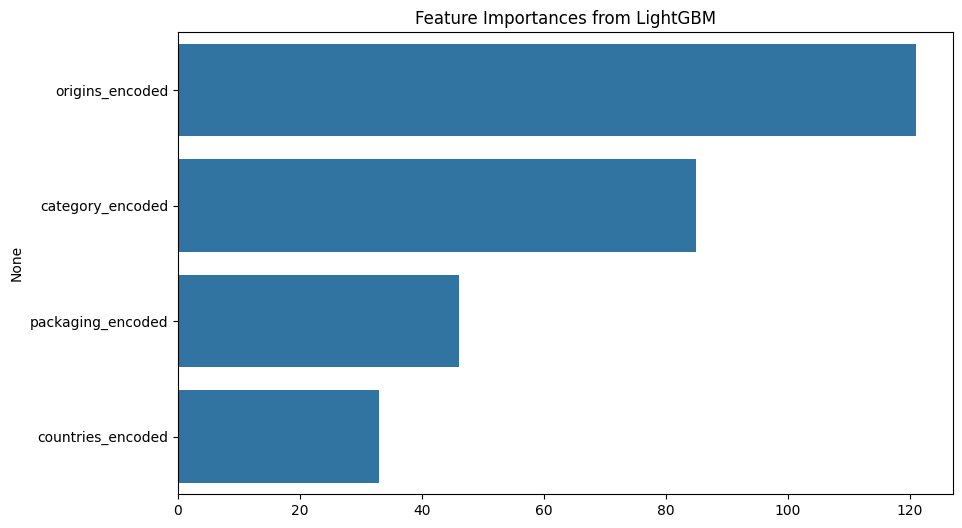

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

feature_importances = pd.Series(
    best_lgbm.feature_importances_,
    index=xtrain.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importances from LightGBM")
plt.show()